Inter RealSense Depth Camera 
Detecting distance 


## Pi recorded data

In [514]:
# Initialize lists to store data
# Divide into two sets of lists:
# Data point being received
# Data points being executed in all received data points 
pi_frameNo = []
pi_frameNo_move = []

pi_timestamp = []
pi_timestamp_move = []

pi_depth = []
pi_depth_move = []

pi_motor = []

# Read the text file
with open('Results/Pi log/Pi couch running weighted lung high fre.txt', 'r') as file:
    for line in file:
        # Split each line into columns based on spaces
        line = line.strip()
        values = line.split(" ")
        #print(len(values))
        
        # Check the number of values in the line
        if len(values) == 5:
            # Handle lines with only frame_number and depth
            pi_frameNo_move.append(int(values[0]))
            pi_timestamp_move.append(float(values[1]))  # Fill missing timestamp with 0
            pi_depth_move.append(float(values[2]))
            if values[3] != "N/A":
                pi_motor.append(float(values[3]))
            else:
                pi_motor.append(None) # Fill missing motor with 0
        elif len(values) == 3:
             pi_frameNo.append(int(values[0]))
             pi_timestamp.append(float(values[1]))  # Fill missing timestamp with 0
             pi_depth.append(float(values[2]))

       
        else:
            # Handle any other unexpected line format
            print(f"Unexpected line format: {line}")
 
pi_depth_offset = []
for item in pi_depth:
    pi_depth_offset.append((item -679.5))
    
pi_timestamps_offset = []
for item in pi_timestamp:
    pi_timestamps_offset.append((item -pi_timestamp[0])/1000000)

pi_timestamps_move_offset = []
for item in pi_timestamp_move:
    pi_timestamps_move_offset.append((item -pi_timestamp_move[0])/1000000)

offset = 50
pi_motor_offset = []
for item in pi_motor:
    if item != None :
        pi_motor_offset.append((item-offset))
    else:
        pi_motor_offset.append(None)


In [506]:
pi_timestamps_offset[-1]

128.027563

In [458]:
pi_depth

[679.5,
 679.3,
 679.4,
 679.7,
 679.9,
 679.3,
 679.3,
 679.3,
 679.1,
 679.0,
 679.0,
 678.7,
 678.8,
 679.0,
 678.7,
 678.5,
 678.8,
 679.0,
 678.8,
 678.4,
 679.3,
 679.8,
 680.2,
 680.7,
 680.5,
 679.6,
 678.7,
 678.9,
 679.2,
 679.1,
 679.0,
 678.9,
 678.4,
 678.8,
 678.7,
 679.1,
 679.4,
 678.9,
 679.6,
 678.8,
 679.1,
 678.9,
 679.4,
 679.5,
 679.1,
 679.0,
 679.2,
 678.8,
 679.3,
 679.2,
 679.2,
 678.6,
 679.1,
 679.4,
 679.0,
 679.6,
 679.1,
 678.8,
 679.1,
 679.5,
 679.4,
 678.9,
 678.6,
 676.9,
 674.9,
 673.7,
 674.4,
 673.9,
 675.4,
 677.3,
 681.1,
 683.9,
 686.2,
 686.3,
 684.7,
 683.6,
 681.9,
 681.0,
 679.7,
 679.1,
 677.5,
 676.1,
 675.1,
 673.6,
 673.3,
 673.0,
 672.7,
 671.9,
 672.5,
 673.3,
 675.1,
 677.1,
 679.3,
 681.8,
 683.6,
 684.6,
 685.8,
 686.0,
 686.3,
 686.5,
 686.0,
 685.2,
 683.0,
 680.7,
 678.0,
 674.7,
 673.4,
 671.7,
 671.0,
 670.5,
 670.1,
 669.1,
 669.9,
 670.9,
 672.3,
 675.6,
 677.4,
 679.4,
 682.1,
 685.5,
 687.0,
 688.4,
 689.2,
 689.6,
 688.8,


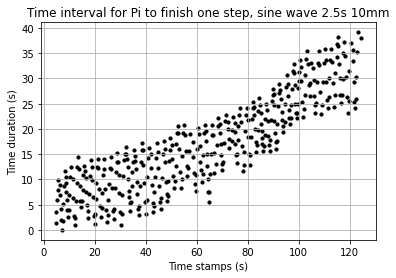

In [515]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(pi_timestamps_move_offset,pi_motor_offset, color='black',s=10, label='time interval')
plt.xlabel('Time stamps (s)')
plt.ylabel('Time duration (s)')
plt.title('Time interval for Pi to finish one step, sine wave 2.5s 10mm')
#plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Verification 

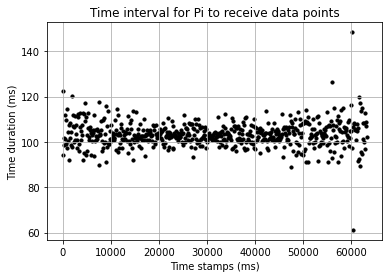

In [420]:
import matplotlib.pyplot as plt
import numpy as np
time_interval = []
for index in range(len(pi_timestamps_offset)-1):
    time_interval.append(pi_timestamps_offset[index+1]-pi_timestamps_offset[index])

plt.scatter(pi_timestamps_offset[:-1],time_interval, color='black',s=10, label='time interval')
plt.xlabel('Time stamps (ms)')
plt.ylabel('Time duration (ms)')
plt.title('Time interval for Pi to receive data points')
#plt.legend()
plt.grid(True)
plt.show()

In [287]:
# Delay/latency in between data point received and motor movement
# pi_frameNo, pi_frameNo_move
# pi_timestamp, pi_timestamp_move
pi_interval = []
count = 0
for i in pi_frameNo_move:
    if i in pi_frameNo:
        #count+=1
        #print(count)
        #print(pi_timestamp[pi_frameNo.index(i)])
        print((pi_timestamp_move[pi_frameNo_move.index(i)]-pi_timestamp[pi_frameNo.index(i)])/1000) # in ms 

0.359
0.213
0.307
0.226
0.209
0.255
0.217
0.211
0.221
0.208
0.191
0.181
0.185
0.184
0.181
0.185
0.179
0.181
0.182
0.235
0.1
0.177
0.179
0.223
0.192
0.17
0.177
0.176
0.174
0.184
0.192
0.186
0.231
0.2
0.209
0.209
0.287
0.21
0.211
0.21
0.21
0.209
0.205
0.21
0.215
0.201
0.207
0.215
0.219
0.251
0.259
0.181
0.179
0.182
0.183
0.198
0.179
0.182
0.18
0.178
0.18
0.181
0.18
0.235
0.232
0.145
0.302
0.173
0.179
0.297
0.279
0.287
0.302
0.428
0.441
0.473
0.242
0.242
0.286
0.334
0.24
0.334
0.279
0.226
0.137
0.229
0.382
0.228
0.241
0.231
0.298
0.265
0.267
0.356
0.206
0.186
0.239
0.367
0.237
0.293
0.206
0.22
0.238
0.241
0.236
0.242
0.238
0.221
0.324
0.243
0.214
0.714
0.292
0.411
0.199
0.26
0.26
0.253
0.261
0.234
0.265
0.241
0.22
0.346
0.215
0.251
0.289
0.261
0.276
0.255
0.238
0.159
0.245
0.2
0.134
0.224
0.296
0.371
0.266
0.273
0.362
0.238
0.275
0.231
0.312
0.409
0.53
0.412
0.366
0.387
0.247
0.28
0.272
0.251
0.268
0.242
0.252
0.22
0.271
0.187
0.191
0.189
0.191
0.19
0.201
0.179
0.174
0.236
0.1
0.199
0.23


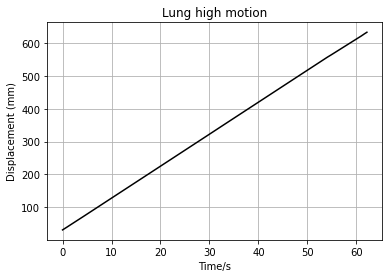

In [228]:

plt.plot(pi_timestamps_offset,pi_frameNo, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Lung high motion')
#plt.legend()
plt.grid(True)
plt.show()

In [291]:
distances2

[642.8,
 643.4,
 643.1,
 643.1,
 643.9,
 643.8,
 643.6,
 643.4,
 643.7,
 643.9,
 643.6,
 643.7,
 643.1,
 643.5,
 643.6,
 643.5,
 643.4,
 642.9,
 643.4,
 643.9,
 643.3,
 643.3,
 643.5,
 643.3,
 643.4,
 643.0,
 643.3,
 643.7,
 643.5,
 643.7,
 643.2,
 643.5,
 643.2,
 643.1,
 643.8,
 643.2,
 643.4,
 642.7,
 643.0,
 643.1,
 642.9,
 643.1,
 643.6,
 643.0,
 643.3,
 643.2,
 643.3,
 643.0,
 642.8,
 642.5,
 642.8,
 642.6,
 643.0,
 642.9,
 642.9,
 643.2,
 643.4,
 642.9,
 643.0,
 643.0,
 642.7,
 642.5,
 643.2,
 643.2,
 643.0,
 643.2,
 643.6,
 643.5,
 643.4,
 642.7,
 643.3,
 643.4,
 642.9,
 643.0,
 642.9,
 642.8,
 642.7,
 642.8,
 643.0,
 643.1,
 643.0,
 642.9,
 643.2,
 643.1,
 643.0,
 643.0,
 643.2,
 643.4,
 643.3,
 643.5,
 643.0,
 643.2,
 643.1,
 642.8,
 643.1,
 643.0,
 643.0,
 642.7,
 643.4,
 642.9,
 642.9,
 642.9,
 642.8,
 642.9,
 643.0,
 642.9,
 643.0,
 643.4,
 642.6,
 642.9,
 642.7,
 642.6,
 642.9,
 643.0,
 643.7,
 644.1,
 645.1,
 646.0,
 647.6,
 648.1,
 647.5,
 648.0,
 648.5,
 649.4,
 650.6,


In [ ]:
def find_first_non_zero_timestamp(timestamps):
    for index, value in enumerate(timestamps):
        if value != 0:
            return index, value
    return None, None  # If no non-zero value is found

index_motionSTART, value = find_first_non_zero_timestamp(pi_timestamp)

import matplotlib.pyplot as plt
import numpy as np

pi_timestamp_offset = []
for time in pi_timestamp:
    if time == 0:
        pi_timestamp_offset.append(0)
    else:
        pi_timestamp_offset.append((time-value)/1000000)

plt.scatter(pi_timestamp_offset,pi_motor, s=20, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Couch motion recorded on Pi, pre-recorded 1D platform motion')
#plt.legend()
plt.ylim(75, 100)
plt.grid(True)
plt.show()

# Input trace

In [281]:
# Input trace 
import numpy as np

# Initialize lists to store data
column1 = []
column2 = []

# Lung_Typical_SI_120s_robot
# Read the text file
with open('Traces/Lung_Typical_SI_120s_robot.txt', 'r') as file:
    for line in file:
        #print(line)
        #column1.append(float(line))
        # Split each line into two columns based on spaces
        values = line.split( )
        
        # Check if there are at least two values
        if len(values) >= 2:
            # Convert values to float and append to respective lists
            column1.append(float(values[0]))
            column2.append(float(values[2]))

# Convert lists to NumPy arrays
data_array_column1 = np.array(column1)
data_array_column2 = np.array(column2)
'''
######## Move all values above zero ###########
data_array_column2_offset = []
for item in data_array_column2:
    data_array_column2_offset.append((item -(min(data_array_column2))))
#######################
'''
# Convert values of data_array_column2 to their opposite sign
#data_array_column2 = [ -x for x in data_array_column2 ]
#data_array_column2_offset = [ -x for x in data_array_column2_offset ]


'\n######## Move all values above zero ###########\ndata_array_column2_offset = []\nfor item in data_array_column2:\n    data_array_column2_offset.append((item -(min(data_array_column2))))\n#######################\n'

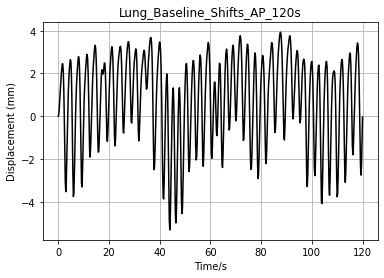

In [282]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data_array_column1,data_array_column2, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Lung_Baseline_Shifts_AP_120s')
#plt.legend()
plt.grid(True)
plt.show()

In [1471]:
len(data_array_column2)

601

### 1D Platform Only file

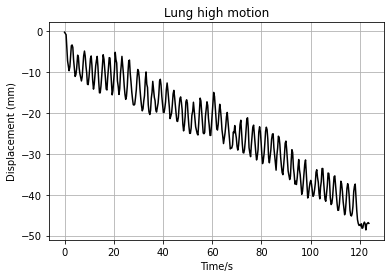

In [1410]:
# 1D platform only measurement 
import pandas as pd

# Read the CSV file
df = pd.read_csv('Results/multiThread_high_fre_lung_1donly.csv')

# Initialize lists to store the data
counts = []
timestamps_1D = []
distances1_1D = []
distances2 = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Extract data from each row
    #count = row['Count']
    timestamp = row['Time']  # Assuming 'Time' is the correct column name for timestamp
    distance1_1D = row['Distance 1']
    #distance2 = row[' Distance 2']
    '''
    # Check if 'Distance 2' exists in the DataFrame
    if 'Distance 2' in df.columns:
        distance2 = row[' Distance 2']
    else:
        distance2 = None  # Set distance2 to None if the column doesn't exist
    '''
    # Append data to respective lists
    #counts.append(count)
    timestamps_1D.append(timestamp)
    distances1_1D.append(distance1_1D)
    #distances2.append(distance2)

# Convert each value back to actual time in seconds
actual_time_array = [value * 0.1 for value in counts]

import matplotlib.pyplot as plt
import numpy as np

distances1_1D_offset = []
for item in distances1_1D:
    distances1_1D_offset.append((item-689))
    
indexBreak = 18
timestamps_1D = timestamps_1D[indexBreak:]
distances1_1D_offset = distances1_1D_offset[indexBreak:]

timestamps_offset_1D = []
for item in timestamps_1D:
    timestamps_offset_1D.append((item -timestamps_1D[0])/1000)



plt.plot(timestamps_offset_1D,distances1_1D_offset, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('Lung high motion')
#plt.legend()
plt.grid(True)
plt.show()

## Compensation file

In [291]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Results/lung_typical_SI_nothreshold.csv')

# Initialize lists to store the data
counts = []
timestamps = []
timestamps_local = []
distances1 = []
distances2 = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    #print(row)
    # Extract data from each row
    count = row['Count']
    timestamp = row['Time']  # Assuming 'Time' is the correct column name for timestamp
    timestamp_local = row[' Local Time']
    distance1 = row[' Distance 1']
    distance2 = row[' Distance 2']
    '''
    # Check if 'Distance 2' exists in the DataFrame
    if 'Distance 2' in df.columns:
        distance2 = row[' Distance 2']
    else:
        distance2 = None  # Set distance2 to None if the column doesn't exist
    '''
    # Append data to respective lists
    counts.append(count)
    timestamps.append(timestamp)
    timestamps_local.append(timestamp_local)
    distances1.append(distance1)
    distances2.append(distance2)

# Convert each value back to actual time in seconds
actual_time_array = [value * 0.1 for value in counts]


indexBreak = 80
counts = counts[indexBreak:]
timestamps = timestamps[indexBreak:]
distances1 = distances1[indexBreak:]
distances2 = distances2[indexBreak:]
'''
# For verification 
for i in range(len(counts)):
    if distances1[i] != pi_depth[i]:
        print("Error in transmission")
'''

distances1_offset = []
for item in distances1:
    distances1_offset.append((item -440.5))
    
distances2_offset = []
for item in distances2:
    distances2_offset.append((item - 448))

timestamps_offset = []
for item in timestamps:
    timestamps_offset.append((item -timestamps[0])/1000)


In [225]:
timestamps_offset[-1:]

[186.71479956054688]

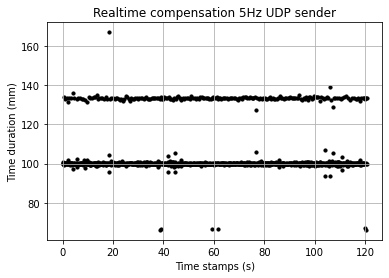

In [172]:
time_interval = []
for index in range(len(timestamps)-1):
    time_interval.append(timestamps[index+1]-timestamps[index])

plt.scatter(timestamps_offset[:-1],time_interval, color='black',s=10, label='time interval')
plt.xlabel('Time stamps (s)')
plt.ylabel('Time duration (mm)')
plt.title('Realtime compensation 5Hz UDP sender')
#plt.legend()
plt.grid(True)
plt.show()

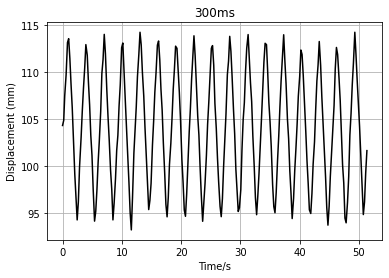

In [455]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Results/trace to couch 2.5s_10mm_sine.csv')

# Initialize lists to store the data
counts_c = []
timestamps_c = []
distances1_c = []
distances2_c = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Extract data from each row
    count= row['Count']
    timestamp = row['Time']  # Assuming 'Time' is the correct column name for timestamp
    distance1 = row['Distance 1']
    distance2 = row[' Distance 2']
    '''
    # Check if 'Distance 2' exists in the DataFrame
    if 'Distance 2' in df.columns:
        distance2 = row[' Distance 2']
    else:
        distance2 = None  # Set distance2 to None if the column doesn't exist
    '''
    # Append data to respective lists
    counts_c.append(count)
    timestamps_c.append(timestamp)
    distances1_c.append(distance1)
    distances2_c.append(distance2)

# Convert each value back to actual time in seconds
#actual_time_array = [value * 0.1 for value in counts]

indexBreak = 0
counts_c = counts_c[indexBreak:]
timestamps_c = timestamps_c[indexBreak:]
distances1_c = distances1_c[indexBreak:]
distances2_c = distances2_c[indexBreak:]

distances1_offset_c = []
for item in distances1_c:
    distances1_offset_c.append((item -638))
    
distances2_offset_c = []
for item in distances2_c:
    distances2_offset_c.append((item - 594))

timestamps_offset_c = []
for item in timestamps_c:
    timestamps_offset_c.append((item -timestamps_c[0])/1000)

plt.plot(timestamps_offset_c,distances2_offset_c, color='black', label='Count vs Distance 2')
plt.xlabel('Time/s')
plt.ylabel('Displacement (mm)')
plt.title('300ms')
#plt.legend()
plt.grid(True)
plt.show()

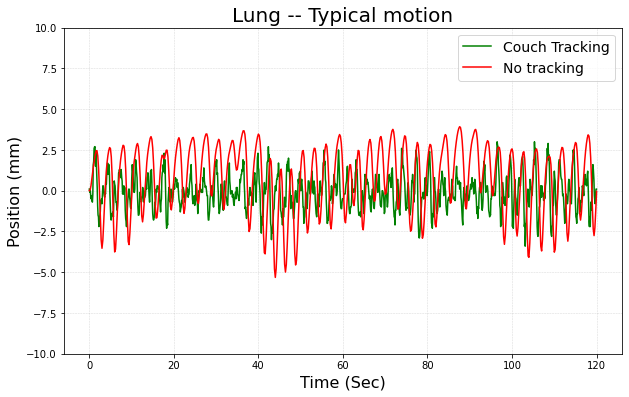

'\nfig, ax = plt.subplots()\nax.plot(data_array_counts, data_array_distances1, color=\'green\', label=\'Couch tracking\')\nax.plot(input_trace_time,input_trace_motion, color=\'red\', label=\'No tracking\')\nax.set_title("Prostate -- Persistant excursion")\nax.set_xlabel(\'Time (Sec)\', fontsize=16)\nax.set_ylabel(\'Position (mm)\', fontsize=16)\nax.set_xlim(0,250)\nax.set_ylim(-20,20)\nwith open("plot.fig", "wb") as f:\n    pickle.dump(fig, f)\nplt.show()\n'

In [294]:


import matplotlib.pyplot as plt
import numpy as np
import pickle

data_array_counts = []
data_array_distances1 = []
data_array_distances2 =[]
data_array_counts_1D = []
data_array_1D = []
input_trace_time = []
input_trace_motion = []
for i in range(len(timestamps_offset)):
    if timestamps_offset[i] <= 120:
        data_array_counts.append(timestamps_offset[i])
        data_array_distances1.append(distances1_offset[i])
        data_array_distances2.append(distances2_offset[i])
        #data_array_counts_1D.append(timestamps_offset_1D[i])
        ##data_array_1D.append(distances1_1D_offset[i])
for i in range(len(data_array_column1)):
    if data_array_column1[i] <=120:
        input_trace_time.append(data_array_column1[i])
        input_trace_motion.append(data_array_column2[i])
'''
#data_array_Pi_time = np.array(pi_timestamp_offset)
#data_array_Pi_motor = np.array(pi_motor_offset)
data_array_counts = np.array(timestamps_offset)
data_array_distances1 = np.array(distances1_offset)
data_array_distances2 = np.array(distances2_offset)
'''

#data_array_timestamps_offset_1D = np.array(timestamps_offset_1D) 
#data_array_distances1_1D = np.array(distances1_1D_offset)

# Plot the data
plt.figure(figsize=(10, 6))
# Assuming 'data_array_counts', 'data_array_distances1', and 'data_array_distances2' are already defined
plt.plot(data_array_counts, data_array_distances1, color='green', label='Couch tracking')   # Change color to red
#plt.scatter(data_array_counts,data_array_distances2, color='red', s=10,label='Couch motion')
#plt.scatter(pi_timestamps_offset,pi_depth_offset, color='black',s=10, label='Pi UDP receviced')
#plt.scatter(pi_timestamps_move_offset,pi_motor_offset, color='black',s=10, label='Couch motor moved')
#data_array_column2_offset
#plt.plot(data_array_column1_1,data_array_column2_2, color='blue', label='liver')
#plt.plot(data_array_column1,data_array_column2_offset, color='red', label='No tracking')
plt.plot(input_trace_time,input_trace_motion, color='red', label='No tracking')
#plt.plot(data_array_counts_1D,data_array_1D, color='grey', label='1D platform')
#plt.scatter(data_array_Pi_time, data_array_Pi_motor, s=10, color='green', label='Pi motion')
#plt.plot(timestamps_offset_c,distances1_offset_c, color='black', label='Couch motion')


plt.xlabel('Time (Sec)', fontsize=16)
plt.ylabel('Position (mm)', fontsize=16)
plt.title('Lung -- Typical motion', fontsize=20)
#plt.legend(['Couch motion by depth camera','Uncompensated motion','Compensated motion','Couch motion on Pi end'])
#plt.legend(['Compensated motion', 'Couch Motion','Input trace'])
plt.legend([ 'Couch Tracking', 'No tracking'], fontsize=14)
plt.ylim(-10, 10)
#plt.xlim(0, 125)
# Set x-axis tick locations every 5 seconds
#plt.xticks(np.arange(min(data_array_counts), max(data_array_counts)+1, 5))

# Adjust grid size and transparency
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Show grid lines on both major and minor ticks with reduced transparency
#plt.savefig("Prostate -- Persistant excursion.svg", format="svg")
plt.show()
'''
fig, ax = plt.subplots()
ax.plot(data_array_counts, data_array_distances1, color='green', label='Couch tracking')
ax.plot(input_trace_time,input_trace_motion, color='red', label='No tracking')
ax.set_title("Prostate -- Persistant excursion")
ax.set_xlabel('Time (Sec)', fontsize=16)
ax.set_ylabel('Position (mm)', fontsize=16)
ax.set_xlim(0,250)
ax.set_ylim(-20,20)
with open("plot.fig", "wb") as f:
    pickle.dump(fig, f)
plt.show()
'''

In [735]:
time_interval_cross = []
for index in range(len(timestamps_offset)-1):
    time_interval_cross.append(pi_timestamps_offset[index]-timestamps_offset[index])

plt.scatter(timestamps_offset[:-1],time_interval_cross, color='black',s=10, label='time interval')
plt.xlabel('Time stamps (s)')
plt.ylabel('Time duration (s)')
plt.title('Time difference between Depth measurement and Pi reader end')
#plt.legend()
plt.grid(True)
plt.show()

IndexError: list index out of range

In [479]:
np.mean(np.abs(time_interval_cross))

0.01102414778114789

In [ ]:
# 1D platform motion
# distances1_1D
import numpy as np
mean_1D = np.mean(data_array_1D)
print('Mean:' , mean_1D)
std_1D = np.std(data_array_1D)
print('SD: ',std_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(data_array_1D, 5)
percentile_95 = np.percentile(data_array_1D, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)
min_1D = np.min(data_array_1D)
print('Minimum: ', min_1D)
max_1D = np.max(data_array_1D)
print('Maximum: ', max_1D)
area = np.trapz(np.abs(data_array_1D),data_array_counts_1D)
print('Area under the curve: ', area)

In [242]:
# Input trace motion 
# distances1_1D
import numpy as np
mean_1D = np.mean(data_array_column2)
print('Mean:' , mean_1D)
std_1D = np.std(data_array_column2)
print('SD: ',std_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(data_array_column2, 5)
percentile_95 = np.percentile(data_array_column2, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)
min_1D = np.min(data_array_column2)
print('Minimum: ', min_1D)
max_1D = np.max(data_array_column2)
print('Maximum: ', max_1D)
area = np.trapz(np.abs(data_array_column2),data_array_column1)
print('Area under the curve: ', area)


Mean: -2.1022840199866755
SD:  3.491753398311992
5%  -6.8909
95%  1.979
Minimum:  -7.1007
Maximum:  3.6237
Area under the curve:  871.5331304000001


In [708]:
# Input trace motion 
# distances1_1D
import numpy as np
mean_1D = np.mean(distances1_offset_c)
print('Mean:' , mean_1D)
std_1D = np.std(distances1_offset_c)
print('SD: ',std_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(distances1_offset_c, 5)
percentile_95 = np.percentile(distances1_offset_c, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)
min_1D = np.min(distances1_offset_c)
print('Minimum: ', min_1D)
max_1D = np.max(distances1_offset_c)
print('Maximum: ', max_1D)
area = np.trapz(np.abs(distances1_offset_c),timestamps_offset_c)
print('Area under the curve: ', area)



Mean: 23.275037929495763
SD:  5.6020636912721855
5%  14.851999999999999
95%  31.724666666666668
Minimum:  13.23527777777781
Maximum:  33.051666666666506
Area under the curve:  1195.5835754496597


In [243]:
# Compensated motion

import numpy as np
mean_1D = np.mean(data_array_distances1 )
print('Mean:' , mean_1D)
std_1D = np.std(data_array_distances1 )
print('SD: ',std_1D)

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(data_array_distances1, 5)
percentile_95 = np.percentile(data_array_distances1, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

min_1D = np.min(data_array_distances1 )
print('Minimum: ', min_1D)
max_1D = np.max(data_array_distances1 )
print('Maximum: ', max_1D)
area = np.trapz(np.abs(data_array_distances1),data_array_counts)
print('Area under the curve: ', area)

Mean: -0.17757065544201805
SD:  0.9668943984634042
5%  -1.7000000000001592
95%  1.3999999999998636
Minimum:  -3.1000000000001364
Maximum:  6.100000000000023
Area under the curve:  133.5664189941433


ValueError: x and y must have same first dimension, but have shapes (265,) and (234,)

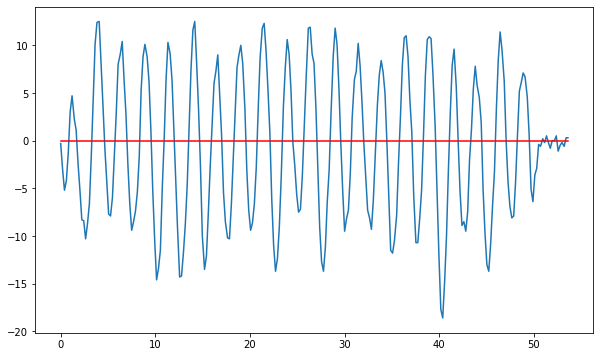

In [1381]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sample data (replace with your actual data)
# Trace 1 (authentic data that cannot be interpolated)
time1 = np.array(timestamps_offset[0:272])  # time stamps
compensatedMotion = np.array(distances1_offset[0:272])   # x values
couchMotion = np.array(distances2_offset[0:234])     # y values

# Trace 2 (data to be interpolated)
data_array_column1  # time stamps
data_array_column2                # input trace motion


# Interpolate the data of Trace 2 to match the time stamps of Trace 1
interp_motion = interp1d(data_array_column1, data_array_column2, kind='linear', fill_value='extrapolate')


# Evaluate the interpolation at the time points of Trace 1
common_motion = interp_motion(time1)
common_motion_offset = []
for item in common_motion:
    common_motion_offset.append(item)

# Generate an zero line for plotting 
zero_line = np.zeros(len(time1))

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Trace 1 (authentic data)
plt.plot(time1, compensatedMotion, label='Couch')
plt.plot(time1, zero_line, color='red')
plt.plot(time1, couchMotion, label='1D Platform')

# Plot interpolated Trace 2
plt.plot(time1, common_motion_offset, color='green',label='Input trace')


plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel('Displacement (mm)', fontsize = 14)
plt.title('Lung mean motion', fontsize = 20)
plt.legend(fontsize = 14)
plt.ylim(-15, 15)
#plt.grid(True)
plt.show()


In [ ]:
# Result quantification 
import numpy as np
mean_1D = np.mean(compensatedMotion)
print('Mean:' , mean_1D)
std_1D = np.std(compensatedMotion)
print('SD: ',std_1D)
min_1D = np.min(compensatedMotion)
print('Minimum: ', min_1D)
max_1D = np.max(compensatedMotion)
print('Maximum: ', max_1D)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(compensatedMotion, 5)
percentile_95 = np.percentile(compensatedMotion, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

In [ ]:
mean_input = np.mean(common_motion_offset)
print('Mean:' , mean_input)
std_input = np.std(common_motion_offset)
print('SD: ',std_input)
min_input = np.min(common_motion_offset)
print('Minimum: ', min_input)
max_input = np.max(common_motion_offset)
print('Maximum: ', max_input)
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(common_motion_offset, 5)
percentile_95 = np.percentile(common_motion_offset, 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 10  # in mm
period = 10     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 10 seconds with a step of 0.2 seconds
t = np.arange(0, 100 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 5  # in mm
period = 10     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 100 seconds with a step of 0.2 seconds
t = np.arange(0, 100 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave Repeated for 10 Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()

# Prepare the data for writing to a file
data = np.column_stack((t, y))

# Define the filename
filename = "sine_wave_data.txt"

# Write the data to a text file
np.savetxt(filename, data, fmt="%10.5f", delimiter="\t")

print(f"Data has been written to {filename}")


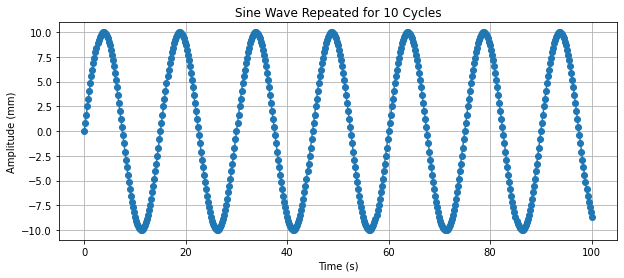

Data has been written to sine_wave_data_15s.txt


In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 10  # in mm
period = 15     # in seconds
time_interval = 0.2  # in seconds

# Generate time values from 0 to 100 seconds with a step of 0.2 seconds
t = np.arange(0, 100 + time_interval, time_interval)

# Generate the sine wave values
y = amplitude * np.sin((2 * np.pi / period) * t)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, marker='o')
plt.title('Sine Wave Repeated for 10 Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mm)')
plt.grid(True)
plt.show()

# Prepare the data for writing to a file
data = np.column_stack((t, y))

# Define the filename
filename = "sine_wave_data_15s.txt"

# Write the data to a text file with the desired formatting
np.savetxt(filename, data, fmt="%.1f %.15f", comments='')

print(f"Data has been written to {filename}")


In [ ]:
# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the second column
        if len(columns) >= 2:
            data.append(float(columns[0]))

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_LR.txt'

# Write the results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(timestamps, data):
        output_file.write(f"{time:.5f} {value:.6f}\n")



In [ ]:
# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the second column
        if len(columns) >= 2:
            data.append(float(columns[2]))

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Filter data to keep every 0.2 seconds (every 10th sample)
filtered_data = data[::10]
filtered_timestamps = timestamps[::10]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_LR.txt'

# Write the filtered results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(filtered_timestamps, filtered_data):
        output_file.write(f"{time:.5f} {value:.6f}\n")

print(f"Filtered data written to {output_file_path}")


In [ ]:
import math

# Define the file path
file_path = 'Results/Hexamotion Traces (original)/Lung/4DLungTrajectories/t_Lung_Baseline_Shifts.txt'

# Read the file and process the data
data = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into columns
        columns = line.strip().split()
        # Extract the first three columns
        if len(columns) >= 3:
            x = float(columns[0])
            y = float(columns[1])
            z = float(columns[2])
            # Compute the Euclidean norm
            magnitude = math.sqrt(x**2 + y**2 + z**2)
            data.append(magnitude)

# Define the sample frequency and calculate the time step
sample_frequency = 50  # Hz
time_step = 1 / sample_frequency  # 0.02 seconds

# Generate timestamps
timestamps = [i * time_step for i in range(len(data))]

# Define the output file path
output_file_path = 'Lung_Baseline_Shifts_combined.txt'

# Write the results to the output file
with open(output_file_path, 'w') as output_file:
    for time, value in zip(timestamps, data):
        output_file.write(f"{time:.5f} {value:.6f}\n")

print(f"Processed data written to {output_file_path}")


In [ ]:
# Define the file path
file_path = 'Lung_Baseline_Shifts_LR.txt'  # Use the path of the generated file

# Read the file and keep only the first 120 seconds of data
data = []
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i >= 601:  # Stop after 600 samples (120 seconds)
            break
        data.append(line.strip())

# Define the output file path for the 120-second trace
output_file_120s_path = 'Lung_Baseline_Shifts_LR_120s.txt'

# Write the filtered results to the new output file
with open(output_file_120s_path, 'w') as output_file:
    for line in data:
        output_file.write(line + '\n')

print(f"120-second data written to {output_file_120s_path}")


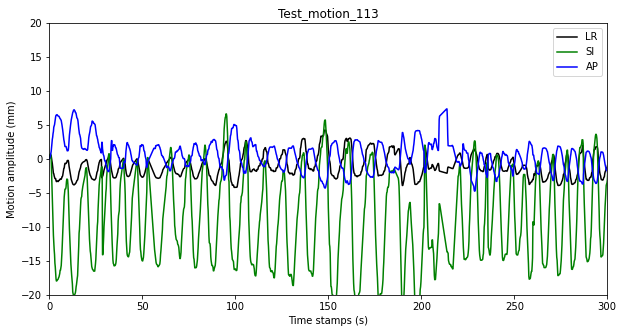

In [632]:
# Plot liver traces

with open("Traces/Test_motion_113.txt", 'r') as file6D:
    traces6D = []
    for line in file6D :
        columns = line.split(' ')
        traces6D.append(columns)
    
    traces6DTime = []
    tracesSI = []
    tracesAP = []
    tracesLR = []
    tracesrSI = []
    tracesrAP = []
    tracesrLR = []
    
    for k in range(0, len(traces6D)) :
        traces6DTime.append(float(traces6D[k][0]))
        tracesLR.append((traces6D[k][1]))
        tracesSI.append(float(traces6D[k][2]))
        tracesAP.append((traces6D[k][3]))
        tracesrLR.append((traces6D[k][4]))
        tracesrSI.append((traces6D[k][5]))
        tracesrAP.append((traces6D[k][6]))
    
    #print(len(traces6D), len(traces6DTime))
    # Convert the string list to a list of floats
    float_LR = [float(value) for value in tracesLR]
    float_SI = [float(value) for value in tracesSI]
    float_AP = [float(value) for value in tracesAP]
    plt.figure(figsize=(10, 5))
    plt.plot(traces6DTime,float_LR, color='black', label='LR')
    plt.plot(traces6DTime,float_SI, color='Green', label='SI')
    plt.plot(traces6DTime,float_AP, color='blue', label='AP')
 
    plt.xlabel('Time stamps (s)')
    plt.ylabel('Motion amplitude (mm)')
    plt.title('Test_motion_113')
    plt.ylim(-20, 20)
    plt.xlim(0, 300)
    plt.legend()
    #plt.grid(True)
    plt.show()
    '''
    with open("Test_motion_112_0.2s.txt", 'w') as file1Dwrite :
        for k in range(0, len(traces6DTime),2):
            file1Dwrite.write(str(traces6DTime[k]) + ' ' + str(tracesSI[k]) + '\n')
    '''

In [1817]:
# Convert 0.4s interval trace to 0.2s interval
import numpy as np
import pandas as pd
from scipy import interpolate

# Load the data from the file
file_path = 'Test_motion_112_0.2s.txt'  # replace with your actual file path
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'displacement'])

# Define the original and new time intervals
original_time = data['time']
new_time = np.arange(original_time.min(), original_time.max() + 0.2, 0.2)
new_time = np.round(new_time, 1)
# Interpolate the displacement values
interpolator = interpolate.interp1d(original_time, data['displacement'], kind='linear')
new_displacement = interpolator(new_time)

# Create a new DataFrame with the interpolated data
new_data = pd.DataFrame({'time': new_time, 'displacement': new_displacement})

# Save the new data to a new file
output_file_path = 'Test_motion_112.txt'  # replace with your desired output file path
new_data.to_csv(output_file_path, sep=' ', index=False, header=False)

print(f"Interpolated data saved to {output_file_path}")


Interpolated data saved to Test_motion_112.txt


In [655]:
# Convert 1D traces to robot readable 6DoF file
# With 120s constraint 
import pandas as pd

def expand_and_limit_trace(input_file, output_file, pos_col_index, duration_limit=120.0):
    # Read the data from the text file
    df = pd.read_csv(input_file, delim_whitespace=True, header=None, names=['Time', 'Position'])
    
    # Filter the data to keep only rows where the time is less than or equal to the duration limit
    df = df[df['Time'] <= duration_limit]
    
    # Create an empty DataFrame with 5 columns of zeros (since there will be 6 position columns in total)
    zeros_df = pd.DataFrame(0.0, index=df.index, columns=[f'Position_{i+1}' for i in range(5)])
    
    # Insert the original position column at the desired index
    zeros_df.insert(pos_col_index, 'Position_Original', df['Position'])
    
    # Concatenate the time column with the expanded positional data
    expanded_df = pd.concat([df['Time'], zeros_df], axis=1)
    
    # Save the expanded data to a new file
    expanded_df.to_csv(output_file, sep=' ', index=False, header=False)

    print(f"Expanded file with {duration_limit}s limit saved to {output_file}")

# Example usage
input_file = 'Traces/Trace 3-Erratic behaviour_no angles 1D.txt'  # Replace with your actual file name
output_file = 'Traces/Trace 3-Erratic behaviour_robot_300s.txt'  # File where the expanded data will be saved
pos_col_index = 1  # Index where you want to place the original positional data (0-based index)
duration_limit = 300  # The maximum duration to keep in the trace (in seconds)

expand_and_limit_trace(input_file, output_file, pos_col_index, duration_limit)


Expanded file with 300s limit saved to Traces/Trace 3-Erratic behaviour_robot_300s.txt


In [644]:
# Convert 1D traces to robot readable 6DoF file
import pandas as pd

def expand_file(input_file, output_file, pos_col_index):
    # Read the data from the text file
    df = pd.read_csv(input_file, delim_whitespace=True, header=None, names=['Time', 'Position'])
    
    # Create an empty DataFrame with 5 columns of zeros (since there will be 6 position columns in total)
    zeros_df = pd.DataFrame(0.0, index=df.index, columns=[f'Position_{i+1}' for i in range(5)])
    
    # Insert the original position column at the desired index
    zeros_df.insert(pos_col_index, 'Position_Original', df['Position'])
    
    # Concatenate the time column with the expanded positional data
    expanded_df = pd.concat([df['Time'], zeros_df], axis=1)
    
    # Save the expanded data to a new file
    expanded_df.to_csv(output_file, sep=' ', index=False, header=False)

    print(f"Expanded file saved to {output_file}")

# Example usage
input_file = 'Traces/Lung_Baseline_Shifts_AP_120s.txt'  # Replace with your actual file name
output_file = 'Traces/Lung_Baseline_Shifts_AP_120s_robot.txt'  # File where the expanded data will be saved
pos_col_index = 1  # Index where you want to place the original positional data (0-based index)

expand_file(input_file, output_file, pos_col_index)


Expanded file saved to Traces/Lung_Baseline_Shifts_AP_120s_robot.txt


In [649]:
import pandas as pd

def retain_columns_and_substitute_zeros(input_file, output_file):
    # Read the data from the text file
    df = pd.read_csv(input_file, delim_whitespace=True, header=None)
    
    # Create a new DataFrame by retaining only the first and third columns
    retained_df = pd.DataFrame({
        'Time': df.iloc[:, 0],  # First column
        'Position_1': 0.0,  # Third column
        'Position_2': df.iloc[:, 2],  # Zeroes for the rest
        'Position_3': 0.0,
        'Position_4': 0.0,
        'Position_5': 0.0,
        'Position_6': 0.0
    })
    
    # Save the new DataFrame to a file
    retained_df.to_csv(output_file, sep=' ', index=False, header=False)

    print(f"Processed file saved to {output_file}")


input_file = 'Traces/Test_motion_113.txt'  # Replace with your actual file name
output_file = 'Traces/Test_motion_113_robot.txt'  # File where the expanded data will be saved

retain_columns_and_substitute_zeros(input_file, output_file)


Processed file saved to Traces/Test_motion_113_robot.txt


In [1097]:
import os
import numpy as np

# Function to load centroid coordinates
def load_centroid(coord_file):
    with open(coord_file, 'r') as f:
        data = np.loadtxt(f)
    return data

# Function to clean up the trajectory
def traj_cleanup(temp_gantry, temp_gtime, temp_marker0, temp_marker1, temp_marker2):
    bounce_clean = True  # Assuming we want to clean bounces
    
    if bounce_clean:
        change = np.diff(temp_gantry)
        bounce = np.where(change < 0)[0] + 1 if temp_gantry[20] > temp_gantry[0] else np.where(change > 0)[0] + 1
        
        # Filter out the invalid points
        valid_indices = np.abs(change[bounce - 1]) > 1
        bounce = bounce[valid_indices]
        
        temp_gantry = np.delete(temp_gantry, bounce)
        temp_gtime = np.delete(temp_gtime, bounce)
        temp_marker0 = np.delete(temp_marker0, bounce, axis=0)
        temp_marker1 = np.delete(temp_marker1, bounce, axis=0)
        temp_marker2 = np.delete(temp_marker2, bounce, axis=0)
    
    return temp_gantry, temp_gtime, temp_marker0, temp_marker1, temp_marker2

# Function to calculate statistics
def calculate_statistics(x, y, z):
    return np.mean(x), np.mean(y), np.mean(z)

# Main function to process trajectory files and compute statistics
def process_trajectories(traj_folder, coord_file, arc1_start, arc2_start, output_file):
    # Load the centroid coordinates
    centroid_data = load_centroid(coord_file)
    centroid = [
        np.mean([centroid_data[0][0], centroid_data[1][0], centroid_data[2][0]]),
        np.mean([centroid_data[0][1], centroid_data[1][1], centroid_data[2][1]]),
        np.mean([centroid_data[0][2], centroid_data[1][2], centroid_data[2][2]])
    ]
    '''
    centroid = [
        np.mean([centroid_data[0], centroid_data[3], centroid_data[6]]),
        np.mean([centroid_data[1], centroid_data[4], centroid_data[7]]),
        np.mean([centroid_data[2], centroid_data[5], centroid_data[8]])
    ]
    '''
    # Initialize containers for gantry and marker data
    gantry_kv, gtime, track1, track2, track3 = [], [], [], [], []
    
    # Process trajectory files
    traj_files = [f for f in os.listdir(traj_folder) if 'MarkerLocationsGA_' in f]
    for file in traj_files:
        file_path = os.path.join(traj_folder, file)
        data = np.loadtxt(file_path, delimiter=',', skiprows=1)
        
        # Subtract centroid from KIM trajectory
        data[:, 4:7] -= centroid[0]
        data[:, 7:10] -= centroid[1]
        data[:, 10:13] -= centroid[2]
        
        # Clean up the trajectory
        temp_gantry, temp_gtime, temp_marker0, temp_marker1, temp_marker2 = traj_cleanup(
            data[:, 2], data[:, 1], data[:, 4:7], data[:, 7:10], data[:, 10:13]
        )
        
        # Merge the points
        gantry_kv.append(temp_gantry)
        gtime.append(temp_gtime)
        track1.append(temp_marker0)
        track2.append(temp_marker1)
        track3.append(temp_marker2)

    # Convert lists to numpy arrays for easier manipulation
    gantry_kv = np.concatenate(gantry_kv)
    gtime = np.concatenate(gtime)
    track1 = np.vstack(track1)
    track2 = np.vstack(track2)
    track3 = np.vstack(track3)
    
    # Calculate positions by averaging markers
    pos = (track1 + track2 + track3) / 3
    x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
    
    # Arc1 statistics
    arc1_mask = (gtime > arc1_start) & (gtime < arc2_start)
    x_arc1, y_arc1, z_arc1 = x[arc1_mask], y[arc1_mask], z[arc1_mask]
    m1, m2, m3 = calculate_statistics(x_arc1, y_arc1, z_arc1)
    
    # Arc2 statistics
    arc2_mask = gtime > arc2_start
    x_arc2, y_arc2, z_arc2 = x[arc2_mask], y[arc2_mask], z[arc2_mask]
    m4, m5, m6 = calculate_statistics(x_arc2, y_arc2, z_arc2)

    # Write statistics to the output file
    with open(output_file, 'w') as f:
        f.write(f"Arc1 Statistics (LR, SI, AP):\n")
        f.write(f"Mean LR: {m1}\nMean SI: {m2}\nMean AP: {m3}\n\n")
        f.write(f"Arc2 Statistics (LR, SI, AP):\n")
        f.write(f"Mean LR: {m4}\nMean SI: {m5}\nMean AP: {m6}\n")

# Example usage:
trajectory_folder = 'Results/Expt_4_11_2024/ISO_couch'
centroid_file = 'Results/Expt_4_11_2024/Centroid.txt'
arc1_start = 270
arc2_start = 530
output_file = 'Liver093 KIM converted.txt'

process_trajectories(trajectory_folder, centroid_file, arc1_start, arc2_start, output_file)


ValueError: could not convert string to float: ' 00001.1.3.46.423632.1352852024113235446738.9.his'

In [1085]:
centroid_data = load_centroid('/Users/annyan/Desktop/realsense_depth/Results/Expt_4_11_2024/Centroid.txt')

In [1090]:
centroid_data

array([[-0.14,  1.53, -0.22],
       [-1.66, -0.91,  0.75],
       [ 1.34, -0.96, -1.24]])

In [ ]:
# Read KIM output file and convert the 3D positional information 
# Read from MarkerLocationsGA_CouchShift

import numpy as np

'''
Marker 3, X= -2.26, Y= -2.57, Z= 2.89
Marker 4, X= 2.51, Y= 3.05, Z= 1.05
Marker 5, X= -0.86, Y= 0.00, Z= -3.40
'''

centroid = [-2.26, -2.57, 2.89,  2.51, 3.05, 1.05, -0.86, 0.00, -3.40]
isocentre = [0, 0, 0]

def process_marker_locations(file_path, centroid, isocentre, output_file):
    """
    Processes the MarkerLocationsGA_* file, subtracts centroid from marker positions,
    and writes the resulting x, y, and z values to a text file.
    
    Arguments:
    - file_path: The path to the MarkerLocationsGA_* file.
    - centroid: A tuple or list of centroid coordinates (x, y, z).
    - output_file: The path to the output text file.
    """
    # Load only the first 29 columns from the file
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=range(29), encoding=None, invalid_raise=False)
    
    # Assuming the first numeric columns correspond to time and marker positions
    time = data[:, 1].astype(float)  # Time stamp
    
    # Extract marker positions (assuming column indices based on your input format)
    marker_0_ap = data[:, 3].astype(float)  # Marker_0_AP
    marker_0_lr = data[:, 4].astype(float)  # Marker_0_LR
    marker_0_si = data[:, 5].astype(float)  # Marker_0_SI
    marker_1_ap = data[:, 6].astype(float)  # Marker_1_AP
    marker_1_lr = data[:, 7].astype(float)  # Marker_1_LR
    marker_1_si = data[:, 8].astype(float)  # Marker_1_SI
    marker_2_ap = data[:, 9].astype(float)  # Marker_2_AP
    marker_2_lr = data[:, 10].astype(float)  # Marker_2_LR
    marker_2_si = data[:, 11].astype(float)  # Marker_2_SI
    
    # Calculate average centroid
    Avg_marker_x = (centroid[0] + centroid[3] + centroid[6]) / 3  # X CENTROID 
    Avg_marker_y = (centroid[1] + centroid[4] + centroid[7]) / 3  # Y CENTROID 
    Avg_marker_z = (centroid[2] + centroid[5] + centroid[8]) / 3  # Z CENTROID 

    # Calculate iso-center
    Avg_marker_x_iso = 10 * (Avg_marker_x - isocentre[0])
    Avg_marker_y_iso = 10 * (Avg_marker_y - isocentre[1])
    Avg_marker_z_iso = 10 * (Avg_marker_z - isocentre[2])

    # Adjust average marker coordinates
    Avg_marker_x = Avg_marker_x_iso
    Avg_marker_y = Avg_marker_z_iso
    Avg_marker_z = -Avg_marker_y_iso

    centroid_P = [Avg_marker_x, Avg_marker_y, Avg_marker_z]

    # Subtract centroid from marker positions
    marker_0_ap -= centroid_P[0]
    marker_0_lr -= centroid_P[1]
    marker_0_si -= centroid_P[2]
    
    marker_1_ap -= centroid_P[0]
    marker_1_lr -= centroid_P[1]
    marker_1_si -= centroid_P[2]
    
    marker_2_ap -= centroid_P[0]
    marker_2_lr -= centroid_P[1]
    marker_2_si -= centroid_P[2]
    
    # Calculate the average position for x, y, z (AP, LR, SI) across the three markers
    x = (marker_0_lr + marker_1_lr + marker_2_lr) / 3  # LR
    y = (marker_0_si + marker_1_si + marker_2_si) / 3  # SI
    z = (marker_0_ap + marker_1_ap + marker_2_ap) / 3  # AP
    
    # Write the results to the output file
    with open(output_file, 'w') as f:
        f.write("Time\tX (LR)\tY (SI)\tZ (AP)\n")
        for i in range(len(x)):
            f.write(f"{time[i]:.6f}\t{x[i]:.6f}\t{y[i]:.6f}\t{z[i]:.6f}\n")
    

# Example usage:
file_path = 'MarkerLocationsGA_CouchShift_0 1.txt'
output_file = 'processed_marker_locations.txt'

process_marker_locations(file_path, centroid, isocentre, output_file)



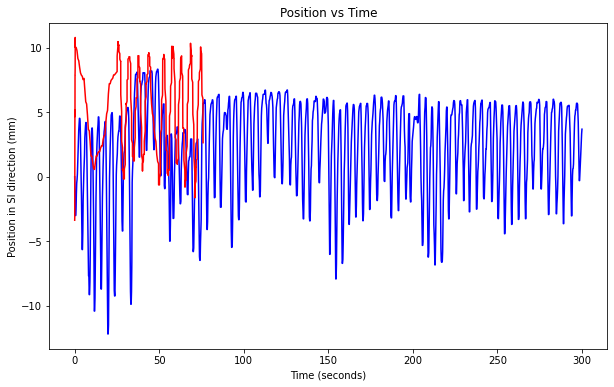

In [670]:
import pandas as pd
import matplotlib.pyplot as plt

# If you're reading from an actual text file
df = pd.read_csv('Traces/2.Medium_complexity_093_robot.txt', delim_whitespace=True, header=None)
df1 = pd.read_csv('processed_marker_locations.txt', delim_whitespace=True, skiprows=1,header=None )

# Extracting the first and third columns
time = df[0]
position_SI = df[2]

kim_time = df1[0]
kim_SI = df1[2]
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time, position_SI, color='b')
plt.plot(kim_time, kim_SI, color='r')
plt.title('Position vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Position in SI direction (mm)')
#plt.grid(True)
plt.show()


In [667]:
df1[0]

0           Time
1       0.000000
2       0.047000
3       0.047000
4       0.047000
         ...    
594    75.852000
595    75.868000
596    75.885000
597    75.905000
598    75.915000
Name: 0, Length: 599, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data_array_counts = []
data_array_distances1 = []
data_array_distances2 =[]
data_array_counts_1D = []
data_array_1D = []
for i in range(len(timestamps_offset)):
    if timestamps_offset[i] <= 120:
        data_array_counts.append(timestamps_offset[i])
        data_array_distances1.append(distances1_offset[i])
        data_array_distances2.append(distances2_offset[i])
        #data_array_counts_1D.append(timestamps_offset_1D[i])
        ##data_array_1D.append(distances1_1D_offset[i])

'''
#data_array_Pi_time = np.array(pi_timestamp_offset)
#data_array_Pi_motor = np.array(pi_motor_offset)
data_array_counts = np.array(timestamps_offset)
data_array_distances1 = np.array(distances1_offset)
data_array_distances2 = np.array(distances2_offset)
'''

#data_array_timestamps_offset_1D = np.array(timestamps_offset_1D) 
#data_array_distances1_1D = np.array(distances1_1D_offset)

# Plot the data
plt.figure(figsize=(10, 6))
# Assuming 'data_array_counts', 'data_array_distances1', and 'data_array_distances2' are already defined
plt.plot(data_array_counts, data_array_distances1, color='red', label='Compensated motion')   # Change color to red
#plt.scatter(data_array_counts,data_array_distances2, color='red', s=10,label='Couch motion')
#plt.scatter(pi_timestamps_offset,pi_depth_offset, color='black',s=10, label='Pi UDP receviced')
#plt.scatter(pi_timestamps_move_offset,pi_motor_offset, color='black',s=10, label='Couch motor moved')
#data_array_column2_offset
#plt.plot(data_array_column1_1,data_array_column2_2, color='blue', label='liver')
plt.plot(data_array_column1,data_array_column2_offset, color='grey', label='Input trace')
#plt.plot(data_array_counts_1D,data_array_1D, color='grey', label='1D platform')
#plt.scatter(data_array_Pi_time, data_array_Pi_motor, s=10, color='green', label='Pi motion')
#plt.plot(timestamps_offset_c,distances1_offset_c, color='black', label='Couch motion')


plt.xlabel('Time/s')
plt.ylabel('ROI measurements/mm')
plt.title('Lung predominant with Robotic arm -- No Threshold')
#plt.legend(['Couch motion by depth camera','Uncompensated motion','Compensated motion','Couch motion on Pi end'])
#plt.legend(['Compensated motion', 'Couch Motion','Input trace'])
plt.legend([ 'Compensated motion', 'Input trace'])
plt.ylim(-20, 20)
#plt.xlim(0, 20)
# Set x-axis tick locations every 5 seconds
#plt.xticks(np.arange(min(data_array_counts), max(data_array_counts)+1, 5))

# Adjust grid size and transparency
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Show grid lines on both major and minor ticks with reduced transparency

plt.show()

## Breath hold trace

       Time  Col2  Positional_Info  Col4  Col5  Col6  Col7
0       0.0   0.0            0.130   0.0   0.0   0.0   0.0
1       0.2   0.0            0.474   0.0   0.0   0.0   0.0
2       0.4   0.0            0.481   0.0   0.0   0.0   0.0
3       0.6   0.0            1.056   0.0   0.0   0.0   0.0
4       0.8   0.0            1.205   0.0   0.0   0.0   0.0
...     ...   ...              ...   ...   ...   ...   ...
2472  494.4   0.0            0.956   0.0   0.0   0.0   0.0
2473  494.6   0.0            0.956   0.0   0.0   0.0   0.0
2474  494.8   0.0            0.956   0.0   0.0   0.0   0.0
2475  495.0   0.0            0.741   0.0   0.0   0.0   0.0
2476  495.2   0.0            0.716   0.0   0.0   0.0   0.0

[2477 rows x 7 columns]


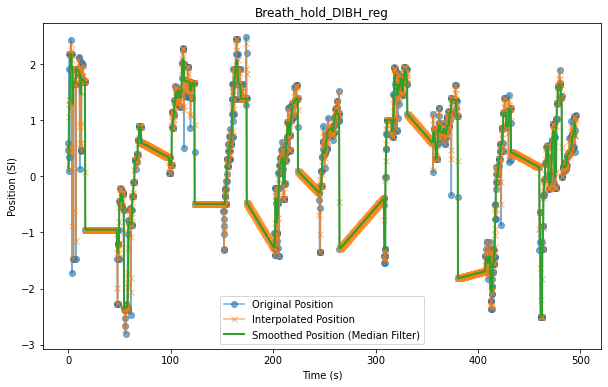

In [914]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import medfilt
import matplotlib.pyplot as plt

def save_first_300_seconds(df, filename):
    """Save only the first 300 seconds of the trace data to a text file."""
    # Filter rows where the timestamp (first column) is <= 300 seconds
    df_300 = df[df["Time"] <= 300]
    # Save to a text file without a header
    df_300.to_csv(filename, sep=' ', index=False, header=False, float_format="%.3g")
    print(f"Saved first 300 seconds to {filename}")


# Load data from the text file
file_path = 'Traces/Breath_hold_DIBH_reg.txt'  # Replace with your file path
df = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                 names=["Time_subtracted",  "LR", "SI", "AP"])
time_offset = float(345.266000)
time = df["Time_subtracted"].values - time_offset
# Extract time and positional information
#time = df["Time_subtracted"].values
position = df["SI"].values  # 5th column positional information

# Interpolation
new_time = np.arange(0, time[-1], 0.2)  # New time interval with 0.2s steps
interpolator = interp1d(time, position, kind='linear', fill_value="extrapolate")
interpolated_position = interpolator(new_time)

# Apply median filter with strength 11 (close to desired strength 10)
smoothed_position = medfilt(interpolated_position, kernel_size=11)
# Format the output: round timestamp to 1 decimal and position to 3 significant figures
final_time = np.round(new_time, 1)
final_position = np.round(smoothed_position, 3)

# Create final output in the desired format
final_trace = np.column_stack([final_time, np.zeros_like(final_time), final_position, np.zeros((final_time.size, 4))])

# Convert to DataFrame for display or further analysis
final_trace_df = pd.DataFrame(final_trace, columns=["Time", "Col2", "Positional_Info", "Col4", "Col5", "Col6", "Col7"])
print(final_trace_df)
final_trace_df.to_csv('Traces/Breath_hold_DIBH_reg_robot.txt', sep=' ', index=False, header=False)
#save_first_300_seconds(final_trace_df, 'Traces/Breath_hold_EEBH_irr_robot_300s.txt')


# Plot the original, interpolated, and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(time, position, 'o-', label='Original Position', alpha=0.6)
plt.plot(final_time, interpolated_position, 'x-', label='Interpolated Position', alpha=0.6)
plt.plot(final_time, smoothed_position, '-', label='Smoothed Position (Median Filter)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Position (SI)')
plt.legend()
plt.title('Breath_hold_DIBH_reg')
plt.show()


In [918]:
import pandas as pd

# Read the text file into a DataFrame
filename = "Results/POWH_test_noTrace.txt"  # Replace with your file path
data = pd.read_csv(filename, sep=" ", header=None, names=["timestamp", "value"])

# Convert the timestamps from nanoseconds to seconds if needed
data['timestamp'] = data['timestamp'] / 1e6  # Convert to seconds

# Calculate the time intervals between consecutive timestamps
data['time_interval'] = data['timestamp'].diff()

# Display the time intervals
#print(data[['timestamp', 'time_interval']])
plt.figure(figsize=(10, 6))
plt.scatter(data['time_interval'], marker='o', label='Time Interval (s)')
plt.title("Time Intervals Between Consecutive Timestamps")
plt.xlabel("Index")
plt.ylabel("Time Interval (s)")
plt.legend()
plt.grid(True)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x432 with 0 Axes>

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of rows to skip
#num_rows_to_skip = 50  # Change this to the number of rows you want to skip

# Read the text file into a DataFrame
filename = "Results/kim latency.txt"  # Replace with your file path
data = pd.read_csv(filename, sep=" ", header=None, names=["timestamp", "value", "couch", "action"], engine='python')
# Convert timestamp from nanoseconds to seconds
data['Time'] = data['timestamp'] / 1e6  # Convert to seconds

# Apply offset by subtracting the first timestamp (in seconds) so it starts from 0
data['Time'] = data['Time'] - data['Time'].iloc[0]

df_no_action = data[pd.isnull(data['action'])][["Time", "value"]] 

# Remove rows that contain "Move" in the "action" column
#data = data[pd.isnull(data['action'])]
# Drop the optional and action columns as they're not needed for interval calculation
#data = data[["Time", "value"]]
# Create DataFrame for rows where "optional" column has values
df_ACTION = data[data['couch'].notnull()][["Time", "value", "couch"]]

                                                                
# Convert the timestamps from nanoseconds to seconds if needed
#data['timestamp'] = data['timestamp'] / 1e6  # Convert to seconds

# Calculate the time intervals between consecutive timestamps
#data['time_interval'] = data['timestamp'].diff()
# Skip the initial rows
#data = data.iloc[num_rows_to_skip:]

# Plot the time intervals as a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(df_no_action['Time'], df_no_action['value'], color='black', marker = 'x', label='KIM output')
plt.scatter(df_ACTION['Time'], df_ACTION['value'], color='blue', label='Pi received and response')
plt.scatter(df_ACTION['Time'], (df_ACTION['couch']-50), color='red', label='Couch position')


plt.title("Liver 093")
plt.xlabel("Time(s)")
plt.ylabel("Measurement (mm)")
plt.legend()
plt.grid(True)
plt.show()

#print(df_ACTION)


FileNotFoundError: [Errno 2] No such file or directory: 'Results/kim latency.txt'

In [1074]:
import pandas as pd

# Define the file path
filename = "Results/UDPLog.txt"  # Replace with your actual file path

# Read the text file into a DataFrame
data = pd.read_csv(filename, sep=",", header=None, names=["Time", "RL", "SI", "AP", "rLR", "rSI", "rAP"],skiprows=1 )
# Convert Time column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Apply offset: set the first timestamp as the reference
data['Time'] = (data['Time'] - data['Time'].iloc[0]).dt.total_seconds()

# Extract only the Time and SI columns
time_si_data = data[["Time", "SI"]]

# Attempt to convert the SI column to numeric, setting non-numeric values to NaN
#data['SI'] = pd.to_numeric(data['SI'], errors='coerce')

# Identify rows where SI could not be converted to float (i.e., non-numeric or abnormal entries)
#abnormal_entries = data[data['SI'].isna()]

# Display the abnormal entries
#print("Abnormal entries in SI column:")
#print(abnormal_entries)


# Display the extracted data
#print(data)


In [992]:
time_si_data['Time']

0       0.000
1       0.000
2       0.000
3       0.016
4       0.016
        ...  
296    46.321
297    46.566
298    46.720
299    46.869
300    47.138
Name: Time, Length: 301, dtype: float64

In [942]:
time_si_data.index

RangeIndex(start=0, stop=302, step=1)

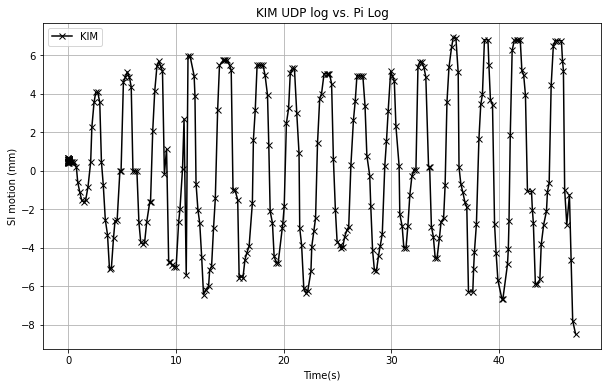

In [1076]:
plt.figure(figsize=(10, 6))
#plt.plot(data['Time'], data['value'], color='blue', marker = 'x', label= 'Pi')
plt.plot( time_si_data['Time'],time_si_data['SI'], color='black',marker = 'x',label= 'KIM')
plt.title("KIM UDP log vs. Pi Log")
plt.xlabel("Time(s)")
plt.ylabel("SI motion (mm)")
plt.legend()
plt.grid(True)
plt.show()

In [974]:
for i in range(len(data['value'])):
    print(i)
    #if (data['value'][i]-time_si_data['SI'][i]) !=0:
        #print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [975]:
time_si_data['SI'][0]

0.555735501892516

In [976]:
data['value'][0]

0.555736

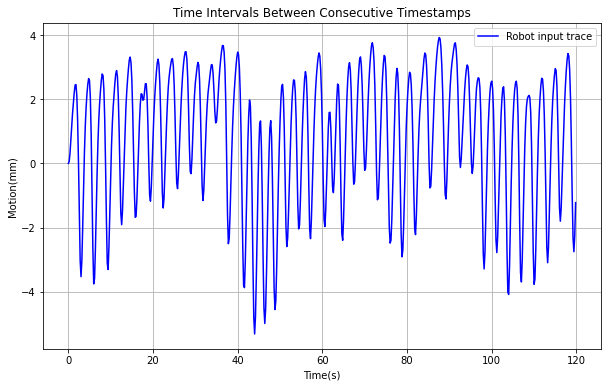

In [129]:
# LIVER 093 Trace
import pandas as pd

# Define the file path
filename = "Traces/Lung_Typical_SI_120s_robot.txt"  # Replace with your actual file path

# Read the text file into a DataFrame
inputRobot = pd.read_csv(filename, sep=" ", header=None, names=["Time", "RL", "SI", "AP", "rLR", "rSI", "rAP"] )

plt.figure(figsize=(10, 6))
plt.plot(inputRobot['Time'][:-1], inputRobot['SI'][:-1], color='blue', label='Robot input trace')
plt.title("Time Intervals Between Consecutive Timestamps")
plt.xlabel("Time(s)")
plt.ylabel("Motion(mm)")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
inputRobot['Time']

0         0.0
1         0.2
2         0.4
3         0.6
4         0.8
        ...  
1496    299.2
1497    299.4
1498    299.6
1499    299.8
1500    300.0
Name: Time, Length: 1501, dtype: float64

In [245]:
# KIM UDP log

import pandas as pd

# Define the file path
filename = "Results/POWH codes/Expt_8_11_2024/latency/UDPLog.txt"  # Replace with your actual file path

# Read the text file into a DataFrame
data = pd.read_csv(filename, sep=",", header=None, names=["Time", "RL", "SI", "AP", "rLR", "rSI", "rAP"],skiprows=1 )
# Convert Time column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Apply offset: set the first timestamp as the reference
data['Time'] = (data['Time'] - data['Time'].iloc[0]).dt.total_seconds()

# Extract only the Time and SI columns
time_si_data = data[["Time", "SI"]]

# Attempt to convert the SI column to numeric, setting non-numeric values to NaN
#data['SI'] = pd.to_numeric(data['SI'], errors='coerce')

# Identify rows where SI could not be converted to float (i.e., non-numeric or abnormal entries)
#abnormal_entries = data[data['SI'].isna()]

# Display the abnormal entries
#print("Abnormal entries in SI column:")
#print(abnormal_entries)


# Display the extracted data
#print(data)


In [246]:
time_si_data

,Time,SI
0,0.000,0.990234
1,0.079,0.992066
2,0.219,0.903540
3,0.454,0.818070
4,0.563,0.907221
...,...,...
223,41.663,-0.369355
224,42.137,-0.281084
225,42.238,-0.282354
226,42.322,-0.283372


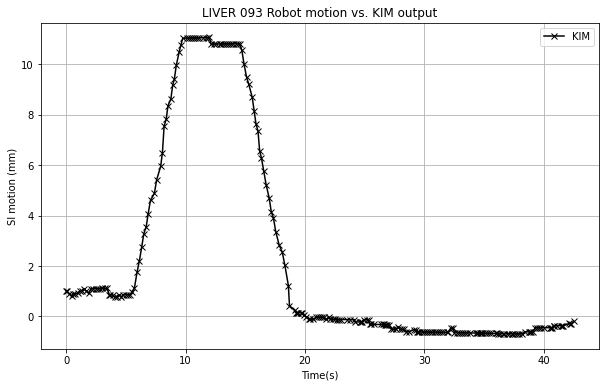

In [248]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
#plt.plot(liver['Time'], liver['SI'], color='blue', label='Robot input trace')
plt.plot( time_si_data['Time'],time_si_data['SI'], marker = 'x', color='black',label= 'KIM')
plt.title("LIVER 093 Robot motion vs. KIM output")
plt.xlabel("Time(s)")
plt.ylabel("SI motion (mm)")
#plt.xlim(0,20)
plt.legend()
plt.grid(True)
plt.show()

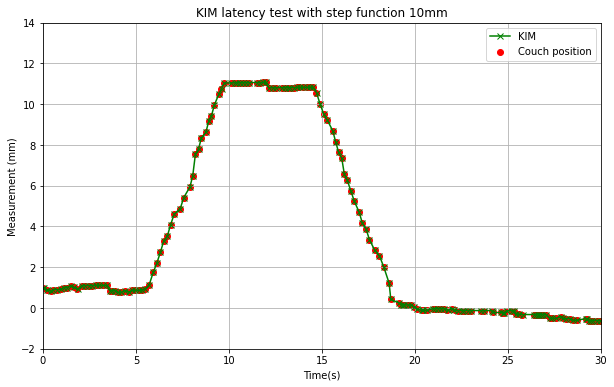

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of rows to skip
#num_rows_to_skip = 50  # Change this to the number of rows you want to skip

# Read the text file into a DataFrame
filename = "Results/POWH codes/pi log 8-11-24/kim latency.txt"  # Replace with your file path
data = pd.read_csv(filename, sep=" ", header=None, names=["timestamp", "value", "couch", "action"], engine='python')
# Convert timestamp from nanoseconds to seconds
data['Time'] = data['timestamp'] / 1e6  # Convert to seconds

# Apply offset by subtracting the first timestamp (in seconds) so it starts from 0
data['Time'] = data['Time'] - data['Time'].iloc[0]

df_no_action = data[pd.isnull(data['action'])][["Time", "value"]] 

# Remove rows that contain "Move" in the "action" column
#data = data[pd.isnull(data['action'])]
# Drop the optional and action columns as they're not needed for interval calculation
#data = data[["Time", "value"]]
# Create DataFrame for rows where "optional" column has values
df_ACTION = data[data['couch'].notnull()][["Time", "value", "couch"]]

                                                                
# Convert the timestamps from nanoseconds to seconds if needed
#data['timestamp'] = data['timestamp'] / 1e6  # Convert to seconds

# Calculate the time intervals between consecutive timestamps
#data['time_interval'] = data['timestamp'].diff()
# Skip the initial rows
#data = data.iloc[num_rows_to_skip:]

# Plot the time intervals as a scatter plot
plt.figure(figsize=(10, 6))
#plt.plot((df_no_action['Time']), df_no_action['value'], color='black', marker = 'x', label='Received from KIM') 
#plt.scatter(df_ACTION['Time'], df_ACTION['value'], color='blue', label='Pi response')
plt.scatter(df_ACTION['Time'], (df_ACTION['couch']), color='red', label='Couch position')
plt.plot( time_si_data['Time'],time_si_data['SI'], marker = 'x', color='green',label= 'KIM')
#plt.plot(inputRobot['Time']-1.5, inputRobot['SI'], color='green', label='Robot input trace')

plt.title("KIM latency test with step function 10mm")
plt.xlabel("Time(s)")
plt.ylabel("Measurement (mm)")
plt.xlim(0,30)
plt.ylim(-2,14)
plt.legend()
plt.grid(True)
plt.show()

#print(df_ACTION)


In [86]:
df_no_action

,Time,value
0,0.000000,1.78554
1,0.091458,1.78681
2,0.224160,1.16568
3,0.414805,1.16734
4,0.607612,1.16897
...,...,...
320,47.340410,-1.18566
322,47.482621,-1.18564
323,47.714085,1.73798
324,47.891445,1.73798


In [118]:
# Input trace ROBOT

import numpy as np
mean_1D = np.mean(inputRobot['SI'][0:240])
print('Mean:' , mean_1D)
std_1D = np.std(inputRobot['SI'][0:240])
print('SD: ',std_1D)

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(inputRobot['SI'][0:240], 5)
percentile_95 = np.percentile(inputRobot['SI'][0:240], 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

min_1D = np.min(inputRobot['SI'][0:240] )
print('Minimum: ', min_1D)
max_1D = np.max(inputRobot['SI'][0:240])
print('Maximum: ', max_1D)
area = np.trapz(np.abs(inputRobot['SI'][0:240]),inputRobot['Time'][0:240])
print('Area under the curve: ', area)

Mean: 0.7732790791666665
SD:  2.0999466818408337
5%  -3.44919615
95%  3.2675688
Minimum:  -5.315824
Maximum:  3.674537
Area under the curve:  92.9081339


In [124]:
# Compensated motion

import numpy as np
mean_1D = np.mean(df_no_action['value'])
print('Mean:' , mean_1D)
std_1D = np.std(df_no_action['value'])
print('SD: ',std_1D)

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(df_no_action['value'], 5)
percentile_95 = np.percentile(df_no_action['value'], 95)
print('5% ',percentile_5)
print('95% ',percentile_95)

min_1D = np.min(df_no_action['value'] )
print('Minimum: ', min_1D)
max_1D = np.max(df_no_action['value'])
print('Maximum: ', max_1D)
area = np.trapz(np.abs(df_no_action['value']),df_no_action['Time'])
print('Area under the curve: ', area)


Mean: 0.34477017500000007
SD:  3.618692872096304
5%  -5.3638085
95%  5.238033999999995
Minimum:  -7.26802
Maximum:  12.1341
Area under the curve:  146.78243760063663


In [1080]:
# Robot trace 
# Step function generation 
import numpy as np
import pandas as pd

def generate_step_motion_trace(amplitude=10.0, increase_duration=4.0, pause_duration=5.0, return_duration=4.0, total_duration=20.0, time_step=0.2, output_file="motion_trace.txt"):
    # Generate time steps
    time_points = np.arange(0, total_duration + time_step, time_step)
    
    # Initialize the position array
    position = np.zeros_like(time_points)
    
    # Define time intervals for each phase
    increase_start = 5.0  # Motion starts after 5 seconds at 0mm
    increase_end = increase_start + increase_duration
    pause_end = increase_end + pause_duration
    return_end = pause_end + return_duration
    
    # Assign positions based on time intervals
    for i, t in enumerate(time_points):
        if increase_start <= t < increase_end:
            # Linear increase from 0mm to amplitude
            position[i] = amplitude * ((t - increase_start) / increase_duration)
        elif increase_end <= t < pause_end:
            # Hold at amplitude during pause
            position[i] = amplitude
        elif pause_end <= t < return_end:
            # Linear decrease back to 0mm
            position[i] = amplitude * (1 - ((t - pause_end) / return_duration))
        else:
            # Position remains 0 outside defined phases
            position[i] = 0.0
    # Round position values to 2 decimal places
    position = np.round(position, 2)

    # Create the dataframe for output with columns similar to your example
    data = {
        "Time": np.round(time_points, 2),
        "Column2": np.zeros_like(time_points),  # Placeholder for additional columns as in example
        "Position": position,
        "Column4": np.zeros_like(time_points),
        "Column5": np.zeros_like(time_points),
        "Column6": np.zeros_like(time_points),
        "Column7": np.zeros_like(time_points),
    }
    df = pd.DataFrame(data)
    
    # Save to txt file
    df.to_csv(output_file, sep=" ", index=False, header=False)
   

# Customize the function call as needed
generate_step_motion_trace(amplitude=10.0, increase_duration=4.0, pause_duration=5.0, return_duration=4.0, total_duration=20.0, time_step=0.2, output_file="robot_step_function_10mm.txt")
